# Relatório

### Leitura dos dados

In [1]:
import struct
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [2]:
# reading binary data (To do)

with open('output.bin', 'rb') as file:
    [h] = struct.unpack('f', file.read(4))
    N = int.from_bytes(file.read(4), byteorder='little')
    M = int.from_bytes(file.read(4), byteorder='little')

print(h)
print(N)
print(M)

-8.390294938393164e+25
32766
3934965316


In [3]:
# reading ascii data

with open('jacobi.dat', 'r') as file:
    h = float(file.readline())
    N = int(file.readline())
    M = int(file.readline())
    u = np.zeros((N, M), float)

    for j in range(M):
        u[j] = file.readline()[:-2].split(sep=" ")


print(h)
print(N)
print(M)
# print(u)

0.01
100
100


## Exercício 1

### a) Desempenho do método de Jacobi paralelizado

A tabela a seguir apresenta o total de iterações, valor central e tempo gasto para cada execução, utilizando N = 400.

In [21]:
data = {
    'Iterações': [   127816,   127816,   127816,   127816],
    'u(.5, .5)': [ -3.75572, -3.75572, -3.75572, -3.75572],
    'Tempo (s)': [  27.5013,  16.9711,  12.3548,  12.7624],
}

df = pd.DataFrame(data, index=[1, 2, 4, 8])
df.index.name = 'threads'
print('Tabela Jacobi')
print()
print(df)

Tabela Jacobi

         Iterações  u(.5, .5)  Tempo (s)
threads                                 
1           127816   -3.75572    27.5013
2           127816   -3.75572    16.9711
4           127816   -3.75572    12.3548
8           127816   -3.75572    12.7624


### b) Speed-up e Eficiência paralela

In [5]:
threads    = list(df.index)
speedup    = []
eficiencia = []

seq = df.loc[1, 'Tempo (s)']

for i in df['Tempo (s)']:
    speedup.append(seq/i)
    eficiencia.append(100*speedup[-1]/seq)


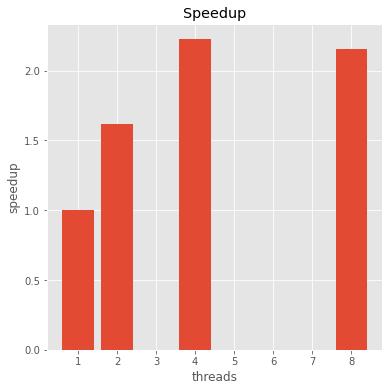

In [6]:
plt.figure(figsize=(6, 6))
plt.bar(threads, speedup)
plt.title('Speedup')
plt.xlabel('threads')
plt.ylabel('speedup')
plt.show()

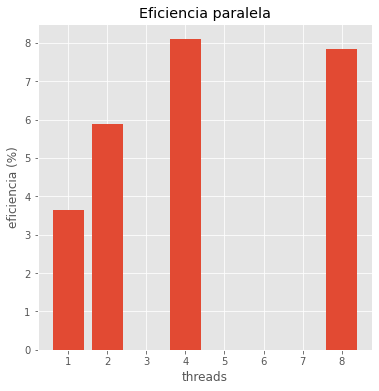

In [7]:
plt.figure(figsize=(6, 6))
plt.bar(threads, eficiencia)
plt.title('Eficiencia paralela')
plt.xlabel('threads')
plt.ylabel('eficiencia (%)')
plt.show()

### c) Plot do resultado

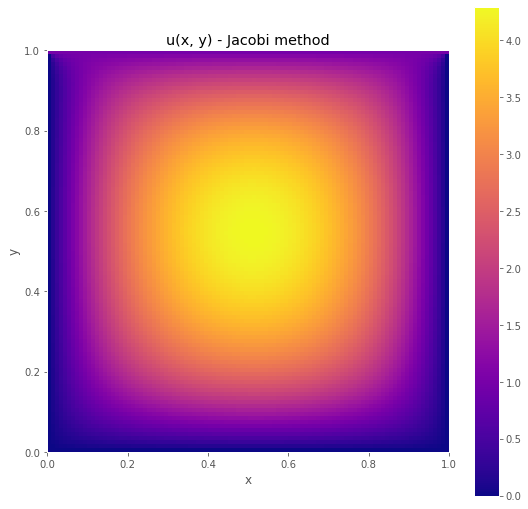

In [12]:
plt.figure(figsize=(9, 9))
plt.imshow(u, cmap='plasma', origin='lower', extent=(0, h*N, 0, h*M))
plt.colorbar()
plt.title('u(x, y) - Jacobi method')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(False)
plt.show()

## Exercício 2

### Resultados método SOR

In [ ]:
# reading ascii data

with open('SOR.dat', 'r') as file:
    h = float(file.readline())
    N = int(file.readline())
    M = int(file.readline())
    u = np.zeros((N, M), float)

    for j in range(M):
        u[j] = file.readline()[:-2].split(sep=" ")


print(h)
print(N)
print(M)

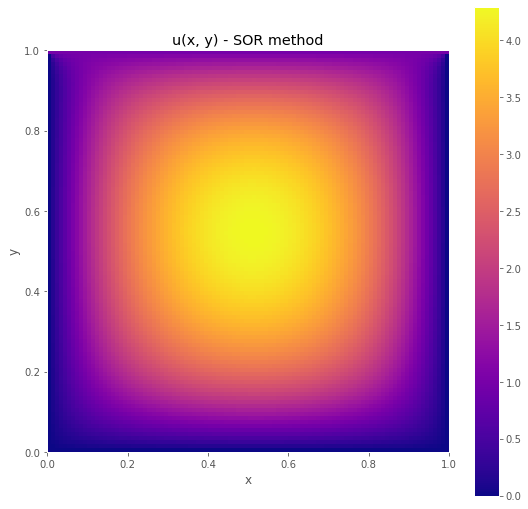

In [11]:
plt.figure(figsize=(9, 9))
plt.imshow(u, cmap='plasma', origin='lower', extent=(0, h*N, 0, h*M))
plt.colorbar()
plt.title('u(x, y) - SOR method')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(False)
plt.show()

### a) Comparando os métodos

Os resultados das tabelas abaixos foram calculados considerando N = 200.

In [25]:
dataJacobi = {
    'Iterações': [    62706,    62706,    62706,    62706],
    'Tempo (s)': [    4.475,    2.916,    2.257,    5.172],
    'SpeedUp'  : [        0,        0,        0,       0,],
}

dataSOR1= {
    'Iterações': [    33576,    33576,    33576,    33576],
    'Tempo (s)': [    6.922,    5.459,    4.371,    5.895],
    'SpeedUp'  : [        0,        0,        0,       0,],
}

dataSOR2= {
    'Iterações': [   100000,   100000,   100000,   100000],
    'Tempo (s)': [    18.84,    16.59,     12.1,     18.1],
    'SpeedUp'  : [        0,        0,        0,       0,],
}

dataSOR3= {
    'Iterações': [   100000,   100000,   100000,   100000],
    'Tempo (s)': [    18.48,    15.69,    12.41,    21.71],
    'SpeedUp'  : [        0,        0,        0,       0,],
}

cases = {
    'Jacobi': dataJacobi,
    'SOR w = 1.00': dataSOR1,
    'SOR w = 1.95': dataSOR2,
    'SOR w = 1.99': dataSOR3,
}

for i in cases:
    for j in range(len(cases[i]['SpeedUp'])):
        cases[i]['SpeedUp'][j] = cases[i]['Tempo (s)'][0] / cases[i]['Tempo (s)'][j]

for i in cases:
    df = pd.DataFrame(cases[i], index=[1, 2, 4, 8])
    df.index.name = 'threads'
    print(i)
    print(df)
    print()

Jacobi
         Iterações  Tempo (s)   SpeedUp
threads                                
1            62706      4.475  1.000000
2            62706      2.916  1.534636
4            62706      2.257  1.982720
8            62706      5.172  0.865236

SOR w = 1.00
         Iterações  Tempo (s)   SpeedUp
threads                                
1            33576      6.922  1.000000
2            33576      5.459  1.267998
4            33576      4.371  1.583619
8            33576      5.895  1.174215

SOR w = 1.95
         Iterações  Tempo (s)   SpeedUp
threads                                
1           100000      18.84  1.000000
2           100000      16.59  1.135624
4           100000      12.10  1.557025
8           100000      18.10  1.040884

SOR w = 1.99
         Iterações  Tempo (s)   SpeedUp
threads                                
1           100000      18.48  1.000000
2           100000      15.69  1.177820
4           100000      12.41  1.489122
8           100000      21.71  

### b) Iterações em função da tolerância

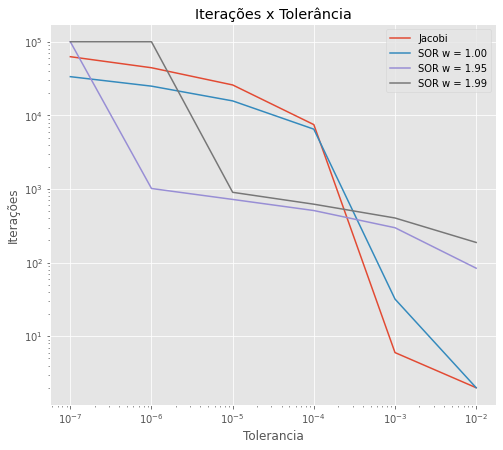

In [38]:
tolerancia = [.01, .001, .0001, .00001, .000001, .0000001] ## valores diferentes para a tolerancia testados

itJacobi = [2, 6, 7492, 25912, 44384, 62706]
itSOR1   = [2, 32, 6500, 15736, 24964, 33576]
itSOR2   = [84, 298, 510, 722, 1016, 100000]
itSOR3   = [188, 404, 622, 902, 100000, 100000]

plt.figure(figsize=(8, 7))
plt.loglog(tolerancia, itJacobi, label='Jacobi')
plt.loglog(tolerancia, itSOR1, label='SOR w = 1.00')
plt.loglog(tolerancia, itSOR2, label='SOR w = 1.95')
plt.loglog(tolerancia, itSOR3, label='SOR w = 1.99')
plt.title('Iterações x Tolerância')
plt.xlabel('Tolerancia')
plt.ylabel('Iterações')
plt.legend()
plt.show()

### c) Conclusão

O método Jacobi não envolve dependência de dados, possibilitando a paralelização sem muitos obstáculos. O método SOR todavia utiliza pontos do próprio vetor que está sendo calculado, o que impediria a paralelização do algoritmo. Para contornar esse problema, foi implementado o método SOR Black-Red, que consiste em duas passadas sobre o vetor e garante a divisão do processo em múltiplas threads.

O método SOR apresentou menor quantidade de iterações em relação ao Jacobi, para os três parâmetros do fator de aceleração testados, indicando sua capacidade de convergir mais rapidamente. 

Em relação à quantidade de threads utilizada em cada teste, observou-se que o melhor desempenho foi para 6 threads, que apresentou a melhor aceleração paralela. Utilizando 8 threads o tempo de execução chegou a ultrapassar o caso sequencial.

Observando o gráfico loglog do número de iterações em função da intolerância, vemos que para tolerâncias em torno de 10^5 os dois últimos casos do método SOR demonstraram melhor desempenho. Entretanto, para aproximações mais precisas, apresentaram desempenho pior que o método SOR para w = 1.00 e para o método Jacobi.